# Naive Bayes Sƒ±nƒ±flandƒ±rma

Naive Bayes sƒ±nƒ±flandƒ±rma, olasƒ±lƒ±k temelli bir makine √∂ƒürenmesi algoritmasƒ±dƒ±r.
Naive Bayes algoritmasƒ±, sƒ±nƒ±flarƒ±n olasƒ±lƒ±klarƒ±nƒ± Bayes Teoremi ile hesaplar:

## Bayes Sƒ±nƒ±flandƒ±rƒ±cƒ±

- S√ºrekli (sayƒ±sal) veriler doƒürudan sayƒ±lmaz(tekrar edilme olasƒ±lƒ±ƒüƒ± √ßok az olduƒüu i√ßin) bu y√ºzden verileri kategorik hale cevirmeliyiz
- A≈üaƒüƒ±daki form√ºle g√∂re karar verir. Bu √ßer√ßevede √∂zelliklerin baƒüƒ±mlƒ± veya baƒüƒ±msƒ±z olup olmamasƒ± √∂nemli deƒüildir. 
- T√ºm olasƒ±lƒ±k daƒüƒ±lƒ±mlarƒ±nƒ± doƒüru ≈üekilde modellenmeye √ßalƒ±≈üƒ±lƒ±r.
- Veri k√ºmesindeki t√ºm √∂zelliklerin ve sƒ±nƒ±flarƒ±n olasƒ±lƒ±k daƒüƒ±lƒ±mlarƒ±nƒ± eksiksiz ve doƒüru bir ≈üekilde √∂ƒürenmeye √ßalƒ±≈üƒ±r.

![bayes_formul](images/bayes_formul.png)

![bayes_formul](images/bayes_formul_aciklama.png)

In [61]:
import pandas as pd

# Veriyi oku ve hedef deƒüi≈ükeni olu≈ütur
df = pd.read_csv("data.csv")
df['gercek'] = df['exam_score'].apply(lambda x: 'Ge√ßti' if x >= 60 else 'Kaldƒ±')

# S√ºrekli deƒüi≈ükenleri kategorik hale getiriyoruz
df['study_cat'] = pd.cut(df['study_hours_per_day'], bins=3, labels=["low", "medium", "high"])
df['attendance_cat'] = pd.cut(df['attendance_percentage'], bins=3, labels=["low", "medium", "high"])

# Ko≈üullu olasƒ±lƒ±klarƒ± √∂ƒürenmek i√ßin gruplama
prob_table = df.groupby(['study_cat', 'attendance_cat', 'gercek'], observed=False).size().reset_index(name='count')

# Sƒ±nƒ±f √∂n olasƒ±lƒ±klarƒ±
class_counts = df['gercek'].value_counts()
total = len(df)

# Bayes sƒ±nƒ±flayƒ±cƒ± fonksiyonu
def predict_bayes_with_probs(row, prob_table, class_counts, total):
    results = {}
    for cls in class_counts.index:
        P_C = class_counts[cls] / total
        match = prob_table[
            (prob_table['study_cat'] == row['study_cat']) &
            (prob_table['attendance_cat'] == row['attendance_cat']) &
            (prob_table['gercek'] == cls)
        ]
        if not match.empty:
            P_X_given_C = match.iloc[0]['count'] / class_counts[cls]
        else:
            P_X_given_C = 1e-6
        results[cls] = P_X_given_C * P_C
    
    total_prob = sum(results.values())
    probs = {cls: results[cls] / total_prob for cls in results}
    predicted_class = max(probs, key=probs.get)
    return predicted_class, probs['Ge√ßti'], probs['Kaldƒ±']

# T√ºm satƒ±rlar i√ßin tahmin
df[['tahmin', 'P_Ge√ßti', 'P_Kaldƒ±']] = df.apply(
    lambda row: pd.Series(predict_bayes_with_probs(row, prob_table, class_counts, total)),
    axis=1
)

# Doƒüruluk oranƒ±
accuracy = (df['gercek'] == df['tahmin']).mean()
print(f"\n‚úÖ Doƒüruluk Oranƒ±: {accuracy:.2f}\n")

# Toplam doƒüru tahmin sayƒ±sƒ±
true_count = (df['gercek'] == df['tahmin']).sum()
print(f"‚úÖ Ba≈üarƒ±lƒ± Tahmin Sayƒ±sƒ±: {true_count} / {len(df)}")

# T√ºm tahminleri yazdƒ±r (renkli: yanlƒ±≈ü tahmin = kƒ±rmƒ±zƒ±)
print("\nüìã T√ºm Satƒ±rlar ƒ∞√ßin Tahmin ve Olasƒ±lƒ±klar:")
for i, row in df.iterrows():
    g = row['gercek']
    t = row['tahmin']
    pg = row['P_Ge√ßti']
    pk = row['P_Kaldƒ±']
    
    if g != t:
        # üî¥ Kƒ±rmƒ±zƒ± renk kodu: \033[91m
        print(f"\033[91mSatƒ±r {i}: Ger√ßek = {g}, Tahmin = {t}, P(Ge√ßti) = {pg:.4f}, P(Kaldƒ±) = {pk:.4f}\033[0m")
    else:
        print(f"Satƒ±r {i}: Ger√ßek = {g}, Tahmin = {t}, P(Ge√ßti) = {pg:.4f}, P(Kaldƒ±) = {pk:.4f}")


# En y√ºksek P(Ge√ßti)
max_gecti_row = df.loc[df['P_Ge√ßti'].idxmax()]
print("\n‚≠ê En Y√ºksek P(Ge√ßti) Olasƒ±lƒ±ƒüƒ±:")
print(f"Ger√ßek = {max_gecti_row['gercek']}, Tahmin = {max_gecti_row['tahmin']}, "
      f"P(Ge√ßti) = {max_gecti_row['P_Ge√ßti']:.4f}, P(Kaldƒ±) = {max_gecti_row['P_Kaldƒ±']:.4f}")

# En y√ºksek P(Kaldƒ±)
max_kaldi_row = df.loc[df['P_Kaldƒ±'].idxmax()]
print("\n‚≠ê En Y√ºksek P(Kaldƒ±) Olasƒ±lƒ±ƒüƒ±:")
print(f"Ger√ßek = {max_kaldi_row['gercek']}, Tahmin = {max_kaldi_row['tahmin']}, "
      f"P(Ge√ßti) = {max_kaldi_row['P_Ge√ßti']:.4f}, P(Kaldƒ±) = {max_kaldi_row['P_Kaldƒ±']:.4f}")



‚úÖ Doƒüruluk Oranƒ±: 0.85

‚úÖ Ba≈üarƒ±lƒ± Tahmin Sayƒ±sƒ±: 851 / 1000

üìã T√ºm Satƒ±rlar ƒ∞√ßin Tahmin ve Olasƒ±lƒ±klar:
Satƒ±r 0: Ger√ßek = Kaldƒ±, Tahmin = Kaldƒ±, P(Ge√ßti) = 0.2552, P(Kaldƒ±) = 0.7448
Satƒ±r 1: Ger√ßek = Ge√ßti, Tahmin = Ge√ßti, P(Ge√ßti) = 1.0000, P(Kaldƒ±) = 0.0000
Satƒ±r 2: Ger√ßek = Kaldƒ±, Tahmin = Kaldƒ±, P(Ge√ßti) = 0.3053, P(Kaldƒ±) = 0.6947
Satƒ±r 3: Ger√ßek = Kaldƒ±, Tahmin = Kaldƒ±, P(Ge√ßti) = 0.2552, P(Kaldƒ±) = 0.7448
Satƒ±r 4: Ger√ßek = Ge√ßti, Tahmin = Ge√ßti, P(Ge√ßti) = 0.9124, P(Kaldƒ±) = 0.0876
Satƒ±r 5: Ger√ßek = Ge√ßti, Tahmin = Ge√ßti, P(Ge√ßti) = 1.0000, P(Kaldƒ±) = 0.0000
Satƒ±r 6: Ger√ßek = Ge√ßti, Tahmin = Ge√ßti, P(Ge√ßti) = 1.0000, P(Kaldƒ±) = 0.0000
Satƒ±r 7: Ger√ßek = Ge√ßti, Tahmin = Ge√ßti, P(Ge√ßti) = 0.8838, P(Kaldƒ±) = 0.1162
Satƒ±r 8: Ger√ßek = Ge√ßti, Tahmin = Ge√ßti, P(Ge√ßti) = 0.9124, P(Kaldƒ±) = 0.0876
Satƒ±r 9: Ger√ßek = Ge√ßti, Tahmin = Ge√ßti, P(Ge√ßti) = 0.9124, P(Kaldƒ±) = 0.0876
Satƒ±r 10: Ger√ßek = Ge√ßti, Tahmi

# Naive Bayes Teoremi
- Naive Bayes, Bayes Teoremi‚Äône dayalƒ± bir sƒ±nƒ±flandƒ±rma algoritmasƒ±dƒ±r.
- Model, her bir √∂zelliƒüin (√∂rneƒüin: √ßalƒ±≈üma s√ºresi, derse katƒ±lƒ±m) sƒ±nƒ±f √ºzerinde baƒüƒ±msƒ±z bir etkisi olduƒüunu varsayar.
Yani bir √∂zelliƒüin deƒüeri, diƒüer bir √∂zelliƒüin deƒüerinden etkilenmez.

x1: √ßalƒ±≈üma s√ºresi (study_hours)

x2: derse katƒ±lƒ±m (attendance)

Naive Bayes, bu iki √∂zellik arasƒ±nda hi√ßbir ili≈üki yokmu≈ü gibi davranƒ±r.

![Naive_bayes](images/naive_bayes_teoremi.png)

![Naive_bayes_formul](images/naive_bayes_formul.png)


‚úÖ Doƒüruluk Oranƒ±: 0.94

üìä Sƒ±nƒ±flandƒ±rma Raporu:

              precision    recall  f1-score   support

       Ge√ßti       0.94      0.97      0.96       149
       Kaldƒ±       0.91      0.82      0.87        51

    accuracy                           0.94       200
   macro avg       0.93      0.90      0.91       200
weighted avg       0.93      0.94      0.93       200



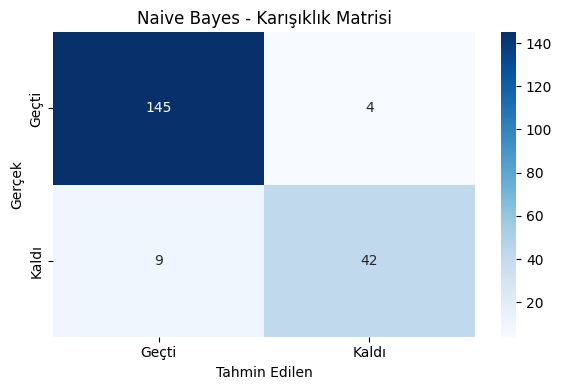

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Veri okuma
df = pd.read_csv("data.csv")
df['result'] = df['exam_score'].apply(lambda x: 'Ge√ßti' if x >= 60 else 'Kaldƒ±')

# √ñzellik ve hedef deƒüi≈ükenleri ayƒ±r
X = df.drop(columns=['student_id', 'grade', 'exam_score', 'result'])
y = df['result']

# Kategorik verileri sayƒ±salla≈ütƒ±r
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include='object').columns:
    X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col])

# Eƒüitim/test ayƒ±r
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Modeli eƒüit
model = GaussianNB()
model.fit(X_train, y_train)

# Tahmin ve olasƒ±lƒ±klar
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# Sƒ±nƒ±f etiketlerini al
class_labels = model.classes_

# Tahmin sonu√ßlarƒ±nƒ± DataFrame'e koy
result_df = X_test.copy()
result_df['gercek'] = y_test.values
result_df['tahmin'] = y_pred
result_df['P_Ge√ßti'] = y_proba[:, list(class_labels).index('Ge√ßti')]
result_df['P_Kaldƒ±'] = y_proba[:, list(class_labels).index('Kaldƒ±')]
result_df['max_proba'] = result_df[['P_Ge√ßti', 'P_Kaldƒ±']].max(axis=1)
result_df['min_proba'] = result_df[['P_Ge√ßti', 'P_Kaldƒ±']].min(axis=1)

accuracy = accuracy_score(y_test, y_pred)
print(f"\n‚úÖ Doƒüruluk Oranƒ±: {accuracy:.2f}")

# Karƒ±≈üƒ±klƒ±k matrisi
print("\nüìä Sƒ±nƒ±flandƒ±rma Raporu:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Naive Bayes - Karƒ±≈üƒ±klƒ±k Matrisi")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Ger√ßek")
plt.tight_layout()
plt.show()



# Sƒ±nƒ±f Bazlƒ± Performans

## Ge√ßti

| Metrik     | Deƒüer | A√ßƒ±klama                                            |
| --------- | ----- | --------------------------------------------------- |
| Precision | 0.94  | Model "Ge√ßti" dediklerinin %94'√º doƒüru              |
| Recall    | 0.97  | Ger√ßek "Ge√ßti" olanlarƒ±n %97‚Äôsini doƒüru tahmin etti |
| F1-Score  | 0.96  | Precision ve recall‚Äôun dengesi √ßok iyi              |
| Support   | 149   | Test setinde 149 √∂ƒürenci ger√ßekten ‚ÄúGe√ßti‚Äù          |

## Kaldƒ±

| Metrik     | Deƒüer | A√ßƒ±klama                                    |
| --------- | ----- | ------------------------------------------- |
| Precision | 0.91  | Model ‚ÄúKaldƒ±‚Äù dediƒüinde %91‚Äôi doƒüru         |
| Recall    | 0.82  | Ger√ßek ‚ÄúKaldƒ±‚Äù olanlarƒ±n %82‚Äôsini bulabildi |
| F1-Score  | 0.87  | Denge fena deƒüil, ama biraz recall d√º≈üm√º≈ü   |
| Support   | 51    | Test setinde 51 √∂ƒürenci ger√ßekten ‚ÄúKaldƒ±‚Äù   |

